# Fase 3 Análisis Exploratorio de Datos (EDA)
Distribución de Ingresos por Categoría Económica:

Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

Análisis Temporal:

Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.
Identificación de Discrepancias:

Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
sys.path.append("../") #Para poder importar
from src.SupportCleaning import fill_organo, fill_unidad_gestora,fill_missing_organo_superior,fill_missing_organo,calcular_porcentaje
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
# Carga el dataset de trabajo
pd.set_option("display.max_columns", None) #Ver todo
df = pd.read_csv("../datos/output/datos_2013_to_2021Fase2.csv", delimiter=",",index_col=0)

df

In [35]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()


,tipo de ingresos,valor ejecutado
0,Operações de crédito - mercado interno,9311740376474.88
1,Contribuições sociais,6261643041818.50
2,Impostos,3944186330924.66
3,Resultado do Banco Central do Brasil,1021719385009.37
4,Amortizações de Empréstimos,782190660864.17
...,...,...
58,Receita da dívida ativa,147.23
59,Contribuições para Entidades Privadas de Serv,0.00
60,Demais receitas de capital,0.00
61,Receitas decorrentes de compensações ao Regim,0.00


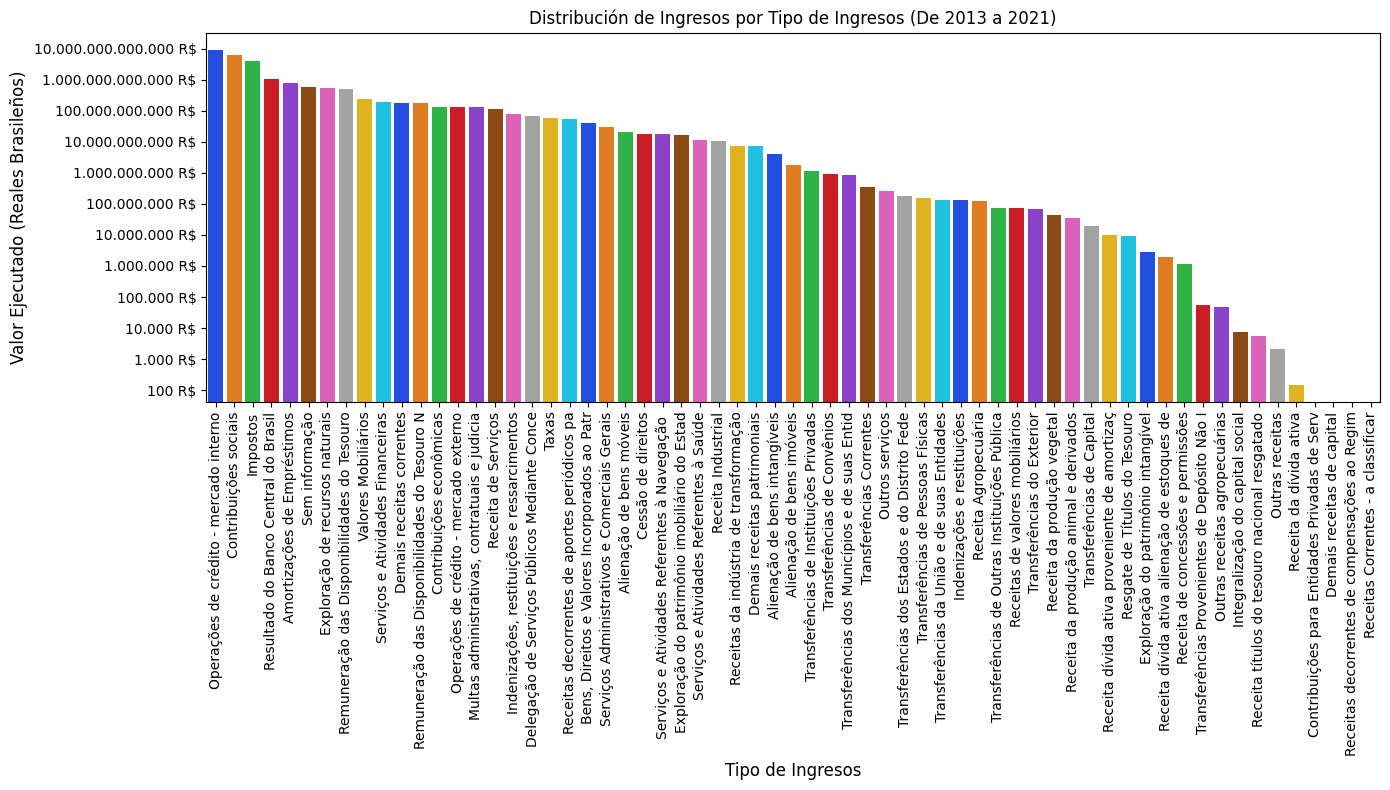

In [83]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(14,8))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Distribución de Ingresos por Tipo de Ingresos (De 2013 a 2021)")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yscale('log')  # Escala logarítmica en el eje X para visualizar mejor los valores pequeños
plt.xticks(rotation=90)
plt.yticks(ticks=[1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13],
            labels=["100 R$","1.000 R$","10.000 R$","100.000 R$","1.000.000 R$","10.000.000 R$","100.000.000 R$",
                    "1.000.000.000 R$","10.000.000.000 R$","100.000.000.000 R$","1.000.000.000.000 R$","10.000.000.000.000 R$"])
plt.tight_layout()

# Top 3 Ingresos más rentables

In [115]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()

,tipo de ingresos,valor ejecutado
0,Operações de crédito - mercado interno,9311740376474.88
1,Contribuições sociais,6261643041818.50
2,Impostos,3944186330924.66


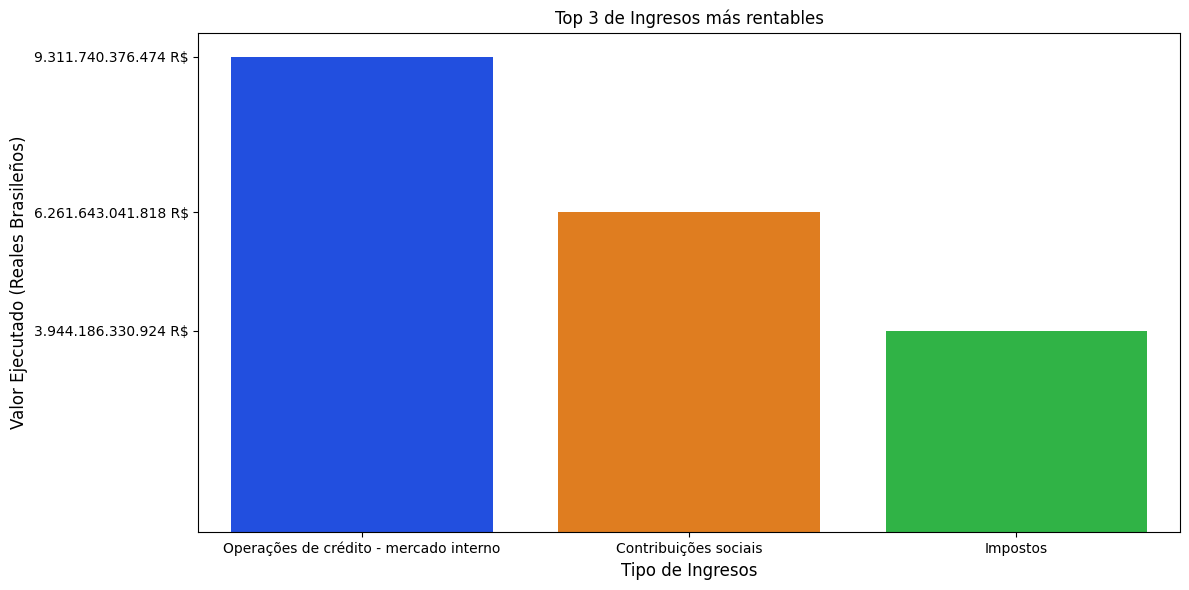

In [114]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()
# Crear un gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Top 3 de Ingresos más rentables")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yticks(ticks=[3944186330924,6261643041818,9311740376474],labels=["3.944.186.330.924 R$","6.261.643.041.818 R$","9.311.740.376.474 R$"])
plt.tight_layout()

# Diferencia promedio entre ingresos previstos y realizados por categoría económica

In [119]:
df['diferencia_ingresos'] = df['valor previsto actualizado'] - df['valor ejecutado']
diferencia_promedio = df.groupby('categoría económica')['diferencia_ingresos'].mean().reset_index()
diferencia_promedio.columns = ['categoría económica', 'diferencia promedio']
diferencia_promedio


,categoría económica,diferencia promedio
0,Receitas Correntes,1236794.84
1,Receitas Correntes - intra-orçamentárias,-746390.83
2,Receitas de Capital,53153851.33
3,Receitas de Capital - intra-orçamentárias,-120487006.11
4,Sem informação,37317309.08
